In [56]:
# import
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
from glob import glob
from bs4 import BeautifulSoup
# import url
from urllib.parse import urlparse
import requests
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)
from konlpy.tag import Okt
import nltk

In [57]:
okt = Okt()

In [58]:
driver = webdriver.Chrome('./chromedriver')
driver.maximize_window()
# driver.get('https://kin.naver.com/')
# time.sleep(1)
# search = driver.find_element_by_xpath('//*[@id="nx_query"]')
# search.send_keys('여친선물')
# driver.find_element_by_xpath('//*[@id="topSearch"]/fieldset/div/a[2]/span').click()
# time.sleep(1)

In [59]:
from tqdm import tqdm_notebook

In [60]:
present_candi_text =[]
for n in tqdm_notebook(range(1,11)):
    driver.get(f'https://kin.naver.com/search/list.nhn?query=여친선물&page={n}')
    html = driver.page_source # 페이지의 elements모두 가져오기
    soup =  BeautifulSoup(html, 'html.parser')
    url = soup.find('ul', 'basic1').find_all('dt')
    for i in range(len(soup.find('ul', 'basic1').find_all('dt'))):
        driver.get(url[i].find('a').attrs['href'])
        time.sleep(1)
        html = driver.page_source # 페이지의 elements모두 가져오기
        soup =  BeautifulSoup(html, 'html.parser')
        a = soup.find('a', {'id' : 'nextPageButton1'})
        if a is not None : 
            driver.find_element_by_xpath('//*[@id="nextPageButton"]').click()
        tmp = soup.find_all('div', {'class' : 'se-module se-module-text'})
        for line in tmp:
            present_candi_text.append(line.text)

        time.sleep(0.5)

 

In [61]:
present_candi_text

쥬얼리제품들이 정말 많이 할인중에 있습니다~ TV 속 연예인들이 착용한 제품들까지도 모두 할인해 준다고 하니 인터넷으로 한번 둘러보시면 좋을 것 같아요!!제이에스티나 할인사이트 링크 걸어놓았어요~ 제품마다 리뷰도 많아서 실제 후기도 참고해보세요~!!https://www.jestina.co.kr/front/N/JEWELRY ',
 ' 마지막으로 위의 선물과 함께 연극티켓 두장 준비해보시는 건 어떠세요?? 아무래도 물질적인 선물도 좋지만, 크리스마스와 같은 기념일에는 특별한 추억을 함께 만들 수 있는 선물이 더 기억에 남을 것 같아요ㅎㅎ질문자분의 행복한 크리스마스를 위해서 대학로 1위 연극으로 하나 추천해드리겠습니다!바로 대학로 대표 로맨스코미디 연극 <한뼘사이>입니다♥<한뼘사이>는 20~30대 커플분들께 가장 인기가 많은 연극으로, 진부하지 않은 러브스토리, 배우들의 탄탄한 연기력이 돋보이는 연극이랍니다:) ',
 " 공연중에는 이렇게 따로 커튼콜 시간도 마련되어 있어, 개인SNS나 사진으로 추억을 쌓아두기도 좋답니다:)여자친구와 함께한 크리스마스 데이트를 사진으로 남겨놓는 것만큼 행복한 일도 없는 것 같아요ㅎㅎ나중에 사진을 보면서 '2020년 크리스마스는 재밌는 연극보면서 특별한 시간을 보냈었지'하는 아름다운 추억이 될겁니다♥ ",
 ' 아래는 저희 연극을 재밌게 봐주셨던 관람객들의 후기입니다~ 개인SNS에 까지 극찬을 해주실 정도로 만족했다고 하시니 질문자분께서도 후회없이 관람하실 수 있을거라고 확신합니다!! ',
 ' 혹시 코로나 때문에 공연관람을 망설이신다면 걱정하지 마세요!<한뼘사이>는 극장소독과 손소독제 사용, 관람객 전원 마스크 착용과 발열체크 등으로 코로나 예방을 위해 열심히 노력하고 있답니다:) 최대한 모든 방역수칙을 철저하게 지키도록 힘쓰고 있으니 공연을 관람하시는 동안은 걱정하지 마시고 편하게 즐기다 가시면 된답니다>< ',
 ' 또 저희 연극을 아래의 링크로 미리 예매해주신다면 할인된 가격으로 만나보실 수 있답니다!12월 20일까지 크리스마

In [62]:
present_text = ''
for each_line in present_candi_text:
    present_text = present_text + each_line + '\n'

In [63]:
len(present_candi_text)

378

In [64]:
tokens_ko = okt.nouns(present_text)
len(tokens_ko)

4882

In [65]:
ko = nltk.Text(tokens_ko, '여자친구 선물')

In [66]:
len(ko.tokens), len(set(ko.tokens))

(4882, 1342)

In [67]:
ko.vocab().most_common(100)

[('선물', 187),
 ('추천', 116),
 ('세대', 61),
 ('아이패드', 58),
 ('제품', 57),
 ('수', 56),
 ('것', 56),
 ('가격', 47),
 ('여자친구', 36),
 ('여친', 29),
 ('커플', 29),
 ('더', 29),
 ('생각', 29),
 ('구매', 28),
 ('지갑', 28),
 ('디자인', 27),
 ('향수', 27),
 ('요', 27),
 ('거', 27),
 ('에어', 27),
 ('목걸이', 26),
 ('색상', 26),
 ('저', 24),
 ('가지', 24),
 ('선택', 24),
 ('하나', 24),
 ('팔찌', 22),
 ('정말', 22),
 ('인치', 22),
 ('향', 21),
 ('가능', 21),
 ('반지', 20),
 ('할인', 19),
 ('요즘', 18),
 ('부담', 18),
 ('링크', 18),
 ('후기', 17),
 ('도움', 17),
 ('사용', 17),
 ('등', 17),
 ('커플링', 17),
 ('모델', 17),
 ('활동', 17),
 ('및', 17),
 ('제', 16),
 ('화장품', 16),
 ('미니', 16),
 ('참고', 15),
 ('때문', 15),
 ('채택', 15),
 ('수수료', 15),
 ('비', 15),
 ('파트너', 14),
 ('스', 14),
 ('센스', 14),
 ('사진', 14),
 ('의미', 14),
 ('용량', 14),
 ('인기', 13),
 ('제작', 13),
 ('용', 13),
 ('가성', 13),
 ('꼭', 13),
 ('꽃', 13),
 ('분', 13),
 ('인테리어', 13),
 ('프로', 13),
 ('퍼퓸', 12),
 ('사이트', 12),
 ('배송', 12),
 ('연극', 12),
 ('해', 12),
 ('구성', 11),
 ('때', 11),
 ('걸', 11),
 ('포장', 11),
 ('통해', 11),
 ('

In [68]:
stop_word = [
    '선물','추천','세대','제품','수','것','가격','더','생각','구매',
    '디자인','요','거','에어','색상','저','가지','선택','하나','인치','향','가능','할인','요즘',
    '부담','링크','후기','도움','사용','등','모델','활동','및','제','미니','참고','때문','채택',
    '수수료','비','파트너','스','센스','사진','의미','용량','인기','제작','용','가성','꼭','분',
    '인테리어','프로','사이트','배송','해','구성','때','걸','포장','통해','수도','사랑','한번',
    '사람','가장','성능','여자','보시','위','질문','마음','제공','브랜드','준비',
    '곳','올리브영','준','개','마감','중','나이','경우','최고','착용','정도','보통','제일','확인',
    '처리','그냥','심플','저희','직접','뭐','가요','머리','정액','실용','독서','강력','생일','후'
]

In [69]:
tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_word]

In [70]:
ko = nltk.Text(tokens_ko, name='여자친구 선물')
ko.vocab().most_common(50)

[('아이패드', 58),
 ('여자친구', 36),
 ('여친', 29),
 ('커플', 29),
 ('지갑', 28),
 ('향수', 27),
 ('목걸이', 26),
 ('팔찌', 22),
 ('정말', 22),
 ('반지', 20),
 ('커플링', 17),
 ('화장품', 16),
 ('꽃', 13),
 ('퍼퓸', 12),
 ('연극', 12),
 ('크리스마스', 11),
 ('담요', 11),
 ('인형', 11),
 ('편지', 10),
 ('악세사리', 10),
 ('귀걸이', 9),
 ('애플', 9),
 ('보틀', 9),
 ('드림캐쳐', 9),
 ('라면', 8),
 ('워터', 8),
 ('마크', 8),
 ('소품', 8),
 ('판매', 7),
 ('말', 7),
 ('링', 7),
 ('이니셜', 7),
 ('끈', 7),
 ('이벤트', 7),
 ('액자', 7),
 ('추억', 7),
 ('틴트', 7),
 ('상품', 7),
 ('코로나', 7),
 ('집', 7),
 ('공부', 7),
 ('회사', 7),
 ('친구', 7),
 ('정보', 7),
 ('고민', 7),
 ('종류', 7),
 ('오늘', 7),
 ('관심', 7),
 ('토닥토닥', 7),
 ('쇼핑', 7)]

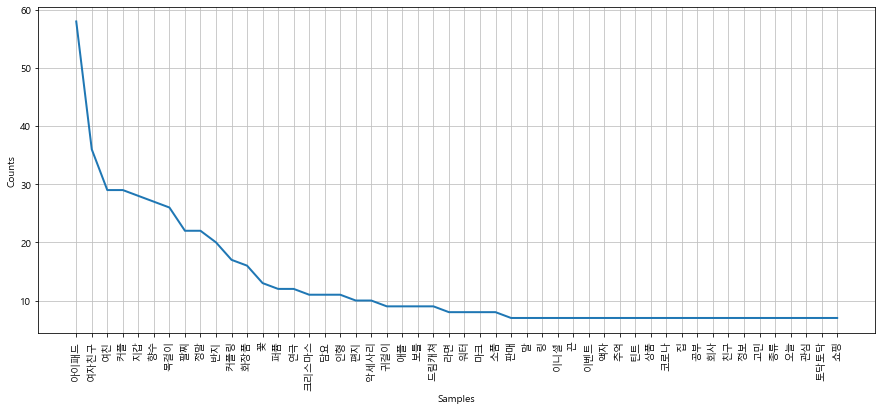

In [71]:
plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

In [77]:
heart = np.array(Image.open('./data/heart.jpg'))

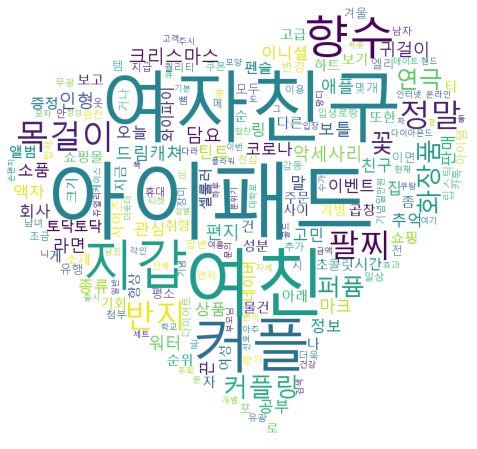

In [79]:
from wordcloud import WordCloud
data = ko.vocab().most_common(200)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      mask=heart,
                      width=1000, height=600
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()